In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import ggplot

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data["Month"]

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [ ]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [ ]:
data.index = data['Month']
del data['Month']

In [ ]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


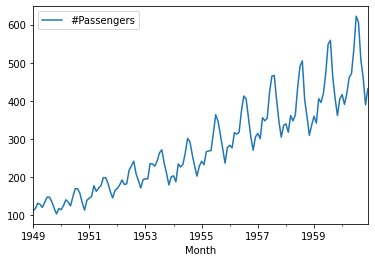

In [ ]:
data.plot()
plt.show()

In [ ]:
#checking the stationarity of the data 

# the statistical properties of a 
#process generating a time series
# do not change over time 


#Thus, time series with trends, 
#or with seasonality, are not stationary 
#— the trend and seasonality will affect the value of the 
#time series at different times.


from statsmodels.tsa.stattools import adfuller
#p-value > 0.05:
#p-value <= 0.05:
result = adfuller(data['#Passengers'])
#print(result)
#print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
	#print('\t%s: %.3f' % (key, value))
 


p-value: 0.991880


In [ ]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['#Passengers'])
if p<0.05:
  print('stattionary')
else:
  print("not stationary")


stattionary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).


 The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.



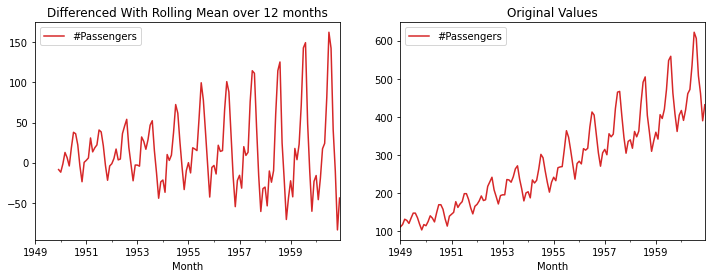

In [ ]:
#Trend is a pattern in data that shows 
#the movement of a series to relatively
#higher or lower values over a long period of time

#removing trend using the rolling mean differencing 

rolling_mean = data.rolling(window=12).mean()

#Rolling means creating a rolling window with
# a specified size and perform calculations on
# the data in this window which, of course, rolls through the data.

#Rolling averages are useful for finding long-term trends otherwise
# disguised by occasional fluctuations. 
rolling_mean_detrended = data - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values", 
          ax=ax2)

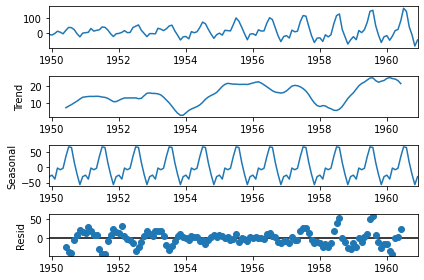

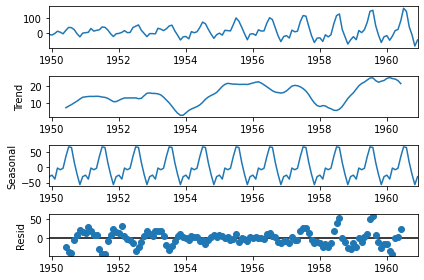

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
#We can check the trend and seasonality using the
# seasonal_decompose() method.
decompose_result.plot()


#Here in the  chart, we can see the decomposed
# structure of data and the structure of the components 
#in the data set which were affecting it.

In [ ]:
rolling_mean_detrended

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


In [ ]:
rolling_mean_detrended.shift(2).head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
rolling_mean_detrended.head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


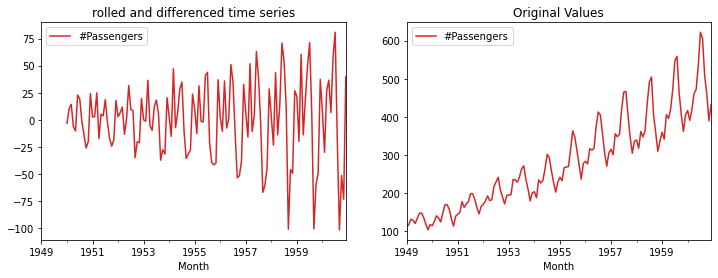

In [ ]:
#removing seasonality from the time series
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values",
          ax=ax2)

In [ ]:
rolling_mean_detrended.shift().head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

In [ ]:
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [ ]:
result = adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())
#print(result)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.154483
p-value: 0.022775
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

Here the blue area is the confidence interval, and the candles started coming inside after the 13th candle. This can be due to the seasonality of 12-13 months.

In [ ]:
dftest = adfuller(rolling_mean_detrended_diff['#Passengers'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val) 

1. ADF :  -3.1544826348635744
2. P-Value :  0.022775264967859313
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


Here in differencing overpower transformed time series, we have got a good p-value near about 0.02 and lower than 0.05 in that we can consider over data is stationary. 

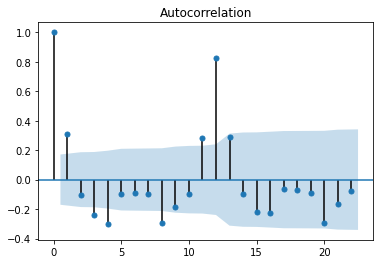

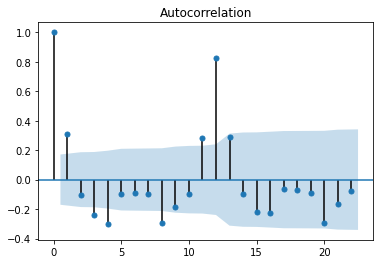

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
#To check for the stationarity of the time series,
# statsmodels provides a plot_acf method to plot an autocorrelation plot.
plot_acf(rolling_mean_detrended_diff['#Passengers'])


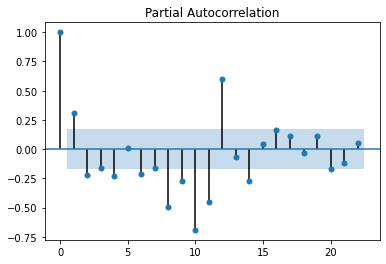

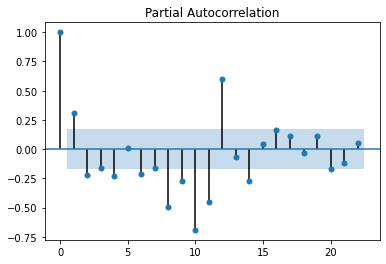

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['#Passengers'])

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
order = auto_arima(rolling_mean_detrended_diff['#Passengers'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.63 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sat, 24 Sep 2022   AIC                           1235.785
Time:                        14:19:23   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.348      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5266      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9136      0.128     -7.156      0.000      -1.164      -0.663
ma.L2         -0.8210      0.168     -4.886      0.000      -1.150      -0.492
ma.L3          0.7469      0.095      7.853      0.000       0.560       0.933
sigma2       586.1836     67.803      8.645      0.000     453.292     719.075
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']

model = ARIMA(train, order=(3,0,3))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                     ARMA(3, 3)   Log Likelihood                -545.991
Method:                       css-mle   S.D. of innovations             22.042
Date:                Sat, 24 Sep 2022   AIC                           1107.981
Time:                        14:20:47   BIC                           1130.281
Sample:                    01-01-1950   HQIC                          1117.037
                         - 12-01-1959                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0650      0.039      1.667      0.096      -0.011       0.141
ar.L1.#Passengers     0.8468      0.099      8.564      0.000       0.653       1.041
ar.L2.#Passengers     0.2433      0.136      1.787      0.074      -0.023       0.510
ar.L3.#Passengers    -0.5315      0.093     -5.734      0.000      -0.713      -0.350
ma.L1.#Passengers    -0.9178      0.088    -10.460      0.000      -1.090      -0.746
ma.L2.#Passengers    -0.9176      0.074    -12.446      0.000      -1.062      -0.773
ma.L3.#Passengers     0.8355      0.078     10.777      0.000       0.684       0.987
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4793           -0.0000j            1.4793           -0.5000
AR.2            0.9685           -0.5779j            1.1278           -0.0856
AR.3            0.9685           +0.5779j            1.1278            0.0856
MA.1           -1.0460           +0.0000j            1.0460            0.5000
MA.2            1.0002           +0.0000j            1.0002            0.0000
MA.3            1.1441           +0.0000j            1.1441            0.0000
-----------------------------------------------------------------------------
"""

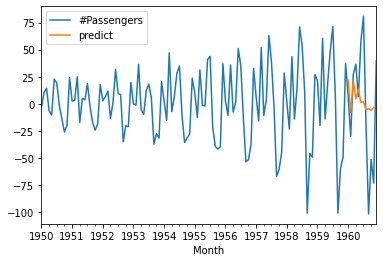

In [ ]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(3,0,3), seasonal_order=(3,0,3,12))
model = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starti

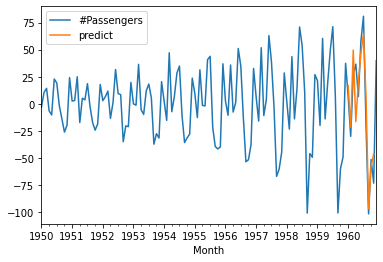

In [ ]:
rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

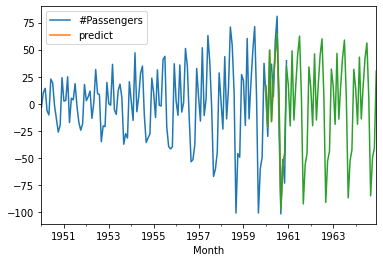

In [ ]:
#predicting the projections for the next 5 years

forecast = model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()